In [0]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#get training images
train_faces = 'gdrive/My Drive/MSc/Computer Vision/train_faces'

In [0]:
#get validation images
val_faces = 'gdrive/My Drive/MSc/Computer Vision/val_faces'

In [0]:
#check one of the images
img = cv2.imread(f'{train_faces}/66/face1.jpg')

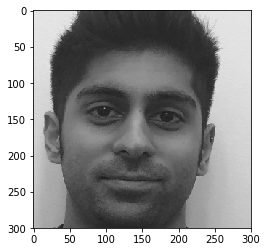

In [7]:
#display test image
plt.imshow(img)

In [0]:
#create data generator to prepare images for input into CNN
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        )

In [9]:
#Data generator for training data
train_generator = datagen.flow_from_directory(
train_faces,
target_size=(128, 128),
color_mode='grayscale',
batch_size=32,
class_mode='categorical')

Found 792 images belonging to 69 classes.


In [10]:
#Data generator for validaiton data
val_generator = datagen.flow_from_directory(
val_faces,
target_size=(128, 128),
color_mode='grayscale',
batch_size=32,
class_mode='categorical')

Found 150 images belonging to 69 classes.


In [0]:
#stop training early if validation loss starts to decrease
early_stopping_monitor = EarlyStopping(patience=2)

#create model
cnn = Sequential()
#add model layers
cnn.add(Conv2D(256, kernel_size=1, activation='relu', input_shape=(128,128,1)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128, kernel_size=1, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, kernel_size=1, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(69, activation='softmax'))

In [0]:
#compile model using accuracy to measure model performance
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#train model
cnn.fit(train_generator, validation_data=val_generator, epochs=30, batch_size=32, callbacks=[early_stopping_monitor])

Epoch 1/30
25/25 [==============================] - 7s 290ms/step - loss: 5.5341 - acc: 0.0492 - val_loss: 4.1634 - val_acc: 0.1600
Epoch 2/30
25/25 [==============================] - 7s 280ms/step - loss: 2.6935 - acc: 0.4154 - val_loss: 1.6379 - val_acc: 0.6600
Epoch 3/30
25/25 [==============================] - 7s 280ms/step - loss: 1.0732 - acc: 0.7652 - val_loss: 0.9632 - val_acc: 0.8133
Epoch 4/30
25/25 [==============================] - 7s 286ms/step - loss: 0.4666 - acc: 0.8801 - val_loss: 0.8726 - val_acc: 0.8133
Epoch 5/30
25/25 [==============================] - 7s 285ms/step - loss: 0.2815 - acc: 0.9293 - val_loss: 0.7357 - val_acc: 0.8333
Epoch 6/30
25/25 [==============================] - 7s 284ms/step - loss: 0.1520 - acc: 0.9470 - val_loss: 0.8911 - val_acc: 0.8267
Epoch 7/30
25/25 [==============================] - 7s 282ms/step - loss: 0.1090 - acc: 0.9684 - val_loss: 0.7779 - val_acc: 0.8533


In [0]:
#save cnn
cnn.save('gdrive/My Drive/MSc/Computer Vision/cnn.h5')